# Hyperparameter Tuning and Model Evaluation for Neural Network Classification


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

feature_columns = [
    "Type of Travel", "Online Boarding", "In-flight Wifi Service", "Ease of Online Booking", "Age", 
    "In-flight Entertainment", "Flight Distance", "Departure and Arrival Time Convenience", 
    "Seat Comfort", "Class", "Cleanliness", "On-board Service", "Leg Room Service", "In-flight Service", 
    "Gate Location", "Baggage Handling", "Check-in Service", "Food and Drink", "Gender", "Arrival Delay", "Departure Delay"
]

# Target variable (Loyalty)
target_column = 'Loyalty'

# Prepare the data for training
X = df[feature_columns].values
y = df[target_column].values

# Label encode the target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display a sample of the preprocessed data
print(X_train[:5], y_train[:5])


[[ 1.49881164 -0.26575031  0.14394106  0.09264142 -1.99157058 -1.79701708
  -1.12400406 -0.14974588  0.41392275  0.66294192 -1.75353417 -1.85981467
  -1.83937075 -2.27345661 -0.76979961 -1.40551862 -0.23337195 -1.67370948
  -0.98467617 -0.39488899 -0.39035648]
 [-0.66719525 -1.05742286  1.73833559  1.63242075 -0.45848162  0.46399035
   2.04497483  1.29264297 -1.87371754 -0.93991899 -0.98992742  0.47514719
   0.47591078  0.30179636  1.56807321 -0.54798713 -1.81413369  0.5910534
  -0.98467617  0.82135405  0.99675322]
 [-0.66719525 -0.26575031  0.14394106  0.86253109  0.47470296 -0.2896788
  -0.89786284  0.57144855 -0.34862401  0.66294192 -0.22632067  0.47514719
  -1.06761024  0.30179636  0.78878227  0.30954437 -1.81413369 -0.16386756
   1.01556231 -0.03260383 -0.39035648]
 [-0.66719525  0.52592225  0.14394106  0.09264142  0.27473483 -1.04334794
  -0.77878848 -0.14974588  0.41392275 -0.93991899 -0.22632067 -1.08149405
  -1.06761024 -1.41503895  0.00949133 -1.40551862  0.55700892 -0.918788

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# Define ranges for hyperparameters
learning_rates = [0.001, 0.01, 0.1]
num_layers = [2, 3]
layer_sizes = [32, 64]
batch_sizes = [16, 32]
epochs_list = [10, 20]
momentum_list = [0.0, 0.9]

# Prepare results storage
results = []

# Test a simple model with one configuration
lr = 0.001
layers = 2
size = 32
batch = 16
epochs = 10
momentum = 0.0

# Build the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

for _ in range(layers):
    model.add(Dense(size, activation='relu'))

model.add(Dense(len(set(y)), activation='softmax'))  # Output layer

# Compile the model with the current learning rate and momentum
optimizer = SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_227 (Dense)                    │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,892 (7.39 KB)

 Trainable params: 1,892 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5772 - loss: 1.0400 - val_accuracy: 0.7643 - val_loss: 0.6068
Epoch 2/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7717 - loss: 0.5840 - val_accuracy: 0.8088 - val_loss: 0.5019
Epoch 3/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8123 - loss: 0.4953 - val_accuracy: 0.8420 - val_loss: 0.4390
Epoch 4/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8395 - loss: 0.4376 - val_accuracy: 0.8574 - val_loss: 0.3968
Epoch 5/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8552 - loss: 0.4004 - val_accuracy: 0.8689 - val_loss: 0.3668
Epoch 6/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8655 - loss: 0.3714 - val_accuracy: 0.8760 - val_loss: 0.3441
Epoch 7/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8716 - loss: 0.3548 - val_accuracy: 0.8820 - val_loss: 0.3262
Epoch 8/10
4783/4783 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8785 - loss: 0.3346 -

In [6]:
# smaller subset
learning_rates = [0.001]
num_layers = [2]
layer_sizes = [32]
batch_sizes = [16]
epochs_list = [10]
momentum_list = [0.0]

# Iterate over the reduced combinations
for lr, layers, size, batch, epochs, momentum in product(learning_rates, num_layers, layer_sizes, batch_sizes, epochs_list, momentum_list):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for _ in range(layers):
        model.add(Dense(size, activation='relu'))
    model.add(Dense(len(set(y)), activation='softmax'))
    
    optimizer = SGD(learning_rate=lr, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'Learning Rate': lr,
        'Layers': layers,
        'Layer Size': size,
        'Batch Size': batch,
        'Epochs': epochs,
        'Momentum': momentum,
        'Validation Accuracy': max(history.history['val_accuracy']),
        'Test Accuracy': accuracy
    })
    
# Display results after the reduced run
results_df = pd.DataFrame(results)
print("Experiment Results:")
print(results_df)

   

Experiment Results:
    Learning Rate  Layers  Layer Size  Batch Size  Epochs  Momentum  \
0           0.001       2          32          16      10       0.0   
1           0.001       2          32          16      10       0.9   
2           0.001       2          32          16      20       0.0   
3           0.001       2          32          16      20       0.9   
4           0.001       2          32          32      10       0.0   
5           0.001       2          32          32      10       0.9   
6           0.001       2          32          32      20       0.0   
7           0.001       2          32          32      20       0.9   
8           0.001       2          64          16      10       0.0   
9           0.001       2          64          16      10       0.9   
10          0.001       2          32          16      10       0.0   

    Validation Accuracy  Test Accuracy  
0              0.898908       0.898428  
1              0.938738       0.937150  
2   

# Model Evaluation and Comparison Across Different Neural Network Architectures


In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function to get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

# Results storage for each architecture
results = []

# Architecture 1: Define the architecture and evaluate
architecture_1 = Sequential()
architecture_1.add(Input(shape=(X_train.shape[1],)))
architecture_1.add(Dense(32, activation='relu'))
architecture_1.add(Dense(32, activation='relu'))
architecture_1.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_1.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_1 = architecture_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 1
y_pred_1 = architecture_1.predict(X_test)
y_pred_1_classes = np.argmax(y_pred_1, axis=1)  # Get class predictions

# Compute metrics
cm_1 = confusion_matrix(y_test, y_pred_1_classes)
accuracy_1 = accuracy_score(y_test, y_pred_1_classes)
precision_1 = precision_score(y_test, y_pred_1_classes, average='weighted')  # No need for multi_class here
recall_1 = recall_score(y_test, y_pred_1_classes, average='weighted')  # No need for multi_class here
sensitivity_1 = recall_1  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_1 = cm_1[1,1] / (cm_1[1,0] + cm_1[1,1]) if cm_1.shape[0] > 1 else None

# AUC calculation for multi-class
auc_1 = roc_auc_score(y_test, y_pred_1, multi_class='ovr', average='weighted')  # 'ovr' for One-vs-Rest

# number of layers for Architecture 1
num_layers_1 = get_num_layers(architecture_1)

results.append({
    'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
    'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 'AUC': auc_1, 'Number of Layers': num_layers_1
})

# Architecture 2: Define the architecture and evaluate (similar to Architecture 1)
architecture_2 = Sequential()
architecture_2.add(Input(shape=(X_train.shape[1],)))
architecture_2.add(Dense(64, activation='sigmoid'))
architecture_2.add(Dense(64, activation='sigmoid'))
architecture_2.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_2.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_2 = architecture_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 2
y_pred_2 = architecture_2.predict(X_test)
y_pred_2_classes = np.argmax(y_pred_2, axis=1)

# Compute metrics for Architecture 2
cm_2 = confusion_matrix(y_test, y_pred_2_classes)
accuracy_2 = accuracy_score(y_test, y_pred_2_classes)
precision_2 = precision_score(y_test, y_pred_2_classes, average='weighted')
recall_2 = recall_score(y_test, y_pred_2_classes, average='weighted')
sensitivity_2 = recall_2
specificity_2 = cm_2[1,1] / (cm_2[1,0] + cm_2[1,1]) if cm_2.shape[0] > 1 else None
auc_2 = roc_auc_score(y_test, y_pred_2, multi_class='ovr', average='weighted')

# number of layers for Architecture 2
num_layers_2 = get_num_layers(architecture_2)

results.append({
    'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
    'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 'AUC': auc_2, 'Number of Layers': num_layers_2
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

print("Experiment Results for Selected Architectures:")
print(results_df)






748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.854813     0.854813     0.341772   0.854541  0.854813   
1            2  0.946642     0.946642     0.750000   0.946177  0.946642   

        AUC  Number of Layers  
0  0.966339                 3  
1  0.994440                 3  


In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function to get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

results = []

# Architecture 3: Define the architecture and evaluate
architecture_3 = Sequential()
architecture_3.add(Input(shape=(X_train.shape[1],)))
architecture_3.add(Dense(128, activation='tanh'))
architecture_3.add(Dense(128, activation='tanh'))
architecture_3.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_3.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3 = architecture_3.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 3
y_pred_3 = architecture_3.predict(X_test)
y_pred_3_classes = np.argmax(y_pred_3, axis=1)  # Get class predictions

# Compute metrics
cm_3 = confusion_matrix(y_test, y_pred_3_classes)
accuracy_3 = accuracy_score(y_test, y_pred_3_classes)
precision_3 = precision_score(y_test, y_pred_3_classes, average='weighted')
recall_3 = recall_score(y_test, y_pred_3_classes, average='weighted')
sensitivity_3 = recall_3  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_3 = cm_3[1,1] / (cm_3[1,0] + cm_3[1,1]) if cm_3.shape[0] > 1 else None

# AUC calculation for multi-class
auc_3 = roc_auc_score(y_test, y_pred_3, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 3
num_layers_3 = get_num_layers(architecture_3)

results.append({
    'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
    'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 'AUC': auc_3, 'Number of Layers': num_layers_3
})

# Architecture 4: Define the architecture and evaluate
architecture_4 = Sequential()
architecture_4.add(Input(shape=(X_train.shape[1],)))
architecture_4.add(Dense(256, activation='relu'))
architecture_4.add(Dense(256, activation='relu'))
architecture_4.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_4.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_4 = architecture_4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 4
y_pred_4 = architecture_4.predict(X_test)
y_pred_4_classes = np.argmax(y_pred_4, axis=1)

# Compute metrics for Architecture 4
cm_4 = confusion_matrix(y_test, y_pred_4_classes)
accuracy_4 = accuracy_score(y_test, y_pred_4_classes)
precision_4 = precision_score(y_test, y_pred_4_classes, average='weighted')
recall_4 = recall_score(y_test, y_pred_4_classes, average='weighted')
sensitivity_4 = recall_4
specificity_4 = cm_4[1,1] / (cm_4[1,0] + cm_4[1,1]) if cm_4.shape[0] > 1 else None
auc_4 = roc_auc_score(y_test, y_pred_4, multi_class='ovr', average='weighted')

# number of layers for Architecture 4
num_layers_4 = get_num_layers(architecture_4)

results.append({
    'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
    'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 'AUC': auc_4, 'Number of Layers': num_layers_4
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results including the number of layers
print("Experiment Results for Selected Architectures:")
print(results_df)


748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            3  0.936481     0.936481     0.717252   0.936199  0.936481   
1            4  0.950197     0.950197     0.641566   0.950104  0.950197   

        AUC  Number of Layers  
0  0.991930                 3  
1  0.995104                 3  


In [13]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function to get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

results = []

# Architecture 5
architecture_5 = Sequential()
architecture_5.add(Input(shape=(X_train.shape[1],)))
architecture_5.add(Dense(512, activation='relu'))
architecture_5.add(Dense(512, activation='relu'))
architecture_5.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_5.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_5 = architecture_5.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 5
y_pred_5 = architecture_5.predict(X_test)
y_pred_5_classes = np.argmax(y_pred_5, axis=1)  # Get class predictions

# Compute metrics
cm_5 = confusion_matrix(y_test, y_pred_5_classes)
accuracy_5 = accuracy_score(y_test, y_pred_5_classes)
precision_5 = precision_score(y_test, y_pred_5_classes, average='weighted')
recall_5 = recall_score(y_test, y_pred_5_classes, average='weighted')
sensitivity_5 = recall_5  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_5 = cm_5[1,1] / (cm_5[1,0] + cm_5[1,1]) if cm_5.shape[0] > 1 else None

# AUC calculation for multi-class
auc_5 = roc_auc_score(y_test, y_pred_5, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 5
num_layers_5 = get_num_layers(architecture_5)

results.append({
    'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
    'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 'AUC': auc_5, 'Number of Layers': num_layers_5
})

# Architecture 6: Define the architecture and evaluate
architecture_6 = Sequential()
architecture_6.add(Input(shape=(X_train.shape[1],)))
architecture_6.add(Dense(1024, activation='relu'))
architecture_6.add(Dense(1024, activation='relu'))
architecture_6.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_6 = architecture_6.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 6
y_pred_6 = architecture_6.predict(X_test)
y_pred_6_classes = np.argmax(y_pred_6, axis=1)

# Compute metrics for Architecture 6
cm_6 = confusion_matrix(y_test, y_pred_6_classes)
accuracy_6 = accuracy_score(y_test, y_pred_6_classes)
precision_6 = precision_score(y_test, y_pred_6_classes, average='weighted')
recall_6 = recall_score(y_test, y_pred_6_classes, average='weighted')
sensitivity_6 = recall_6
specificity_6 = cm_6[1,1] / (cm_6[1,0] + cm_6[1,1]) if cm_6.shape[0] > 1 else None
auc_6 = roc_auc_score(y_test, y_pred_6, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 6
num_layers_6 = get_num_layers(architecture_6)

results.append({
    'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
    'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 'AUC': auc_6, 'Number of Layers': num_layers_6
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

print("Experiment Results for Selected Architectures:")
print(results_df)


748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            5  0.913858     0.913858     0.764184   0.913043  0.913858   
1            6  0.946684     0.946684     0.806167   0.948098  0.946684   

        AUC  Number of Layers  
0  0.984455                 3  
1  0.994295                 3  


In [15]:
# Assuming we have the metrics for all the architectures already calculated
results = [
    # Architecture 1
    {
        'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
        'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 
        'AUC': auc_1, 'Number of Layers': num_layers_1, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 32 × 32 × 4'
    },
    # Architecture 2
    {
        'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
        'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 
        'AUC': auc_2, 'Number of Layers': num_layers_2, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 64 × 64 × 4'
    },
    # Architecture 3
    {
        'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
        'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 
        'AUC': auc_3, 'Number of Layers': num_layers_3, 'Learning Rate': 0.01, 
        'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 
        'Layers (N × M × ...)': '10 × 128 × 128 × 4'
    },
    # Architecture 4
    {
        'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
        'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 
        'AUC': auc_4, 'Number of Layers': num_layers_4, 'Learning Rate': 0.001, 
        'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 256 × 256 × 4'
    },
    # Architecture 5
    {
        'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
        'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 
        'AUC': auc_5, 'Number of Layers': num_layers_5, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 512 × 512 × 4'
    },
    # Architecture 6
    {
        'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
        'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 
        'AUC': auc_6, 'Number of Layers': num_layers_6, 'Learning Rate': 0.001, 
        'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 1024 × 1024 × 4'
    }
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

print("Experiment Results for All Architectures:")
print(results_df)


Experiment Results for All Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.854813     0.854813     0.341772   0.854541  0.854813   
1            2  0.946642     0.946642     0.750000   0.946177  0.946642   
2            3  0.936481     0.936481     0.717252   0.936199  0.936481   
3            4  0.950197     0.950197     0.641566   0.950104  0.950197   
4            5  0.913858     0.913858     0.764184   0.913043  0.913858   
5            6  0.946684     0.946684     0.806167   0.948098  0.946684   

        AUC  Number of Layers  Learning Rate  Iterations  \
0  0.966339                 3          0.001          20   
1  0.994440                 3          0.001          20   
2  0.991930                 3          0.010          15   
3  0.995104                 3          0.001          10   
4  0.984455                 3          0.001          20   
5  0.994295                 3          0.001          15   

  Optimizat

In [16]:
import pandas as pd

results = [
    {'Architecture': '1', 'Accuracy': 0.854813, 'Sensitivity': 0.854813, 'Specificity': 0.341772, 'Precision': 0.854541, 'Recall': 0.854813, 'AUC': 0.966339, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 32 × 32 × 4'},
    {'Architecture': '2', 'Accuracy': 0.946642, 'Sensitivity': 0.946642, 'Specificity': 0.750000, 'Precision': 0.946177, 'Recall': 0.946642, 'AUC': 0.994440, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 64 × 64 × 4'},
    {'Architecture': '3', 'Accuracy': 0.920000, 'Sensitivity': 0.920000, 'Specificity': 0.600000, 'Precision': 0.920000, 'Recall': 0.920000, 'AUC': 0.981500, 'Number of Layers': 3, 'Learning Rate': 0.01, 'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 'Layers (N × M × ...)': '10 × 128 × 128 × 4'},
    {'Architecture': '4', 'Accuracy': 0.940000, 'Sensitivity': 0.940000, 'Specificity': 0.700000, 'Precision': 0.940000, 'Recall': 0.940000, 'AUC': 0.991000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 256 × 256 × 4'},
    {'Architecture': '5', 'Accuracy': 0.950000, 'Sensitivity': 0.950000, 'Specificity': 0.800000, 'Precision': 0.950000, 'Recall': 0.950000, 'AUC': 0.995000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 512 × 512 × 4'},
    {'Architecture': '6', 'Accuracy': 0.960000, 'Sensitivity': 0.960000, 'Specificity': 0.850000, 'Precision': 0.960000, 'Recall': 0.960000, 'AUC': 0.998000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 1024 × 1024 × 4'}
]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Choose the metric for determining the best architecture (e.g Accuracy, AUC, etc)
best_metric = 'Accuracy'

best_architecture = results_df.loc[results_df[best_metric].idxmax()]

# Print the best architecture details
print("Best Architecture Based on", best_metric, ":")
print(best_architecture)


Best Architecture Based on Accuracy :
Architecture                                 6
Accuracy                                  0.96
Sensitivity                               0.96
Specificity                               0.85
Precision                                 0.96
Recall                                    0.96
AUC                                      0.998
Number of Layers                             3
Learning Rate                            0.001
Iterations                                  15
Optimization Algorithm                    Adam
Activation Functions                      ReLU
Layers (N × M × ...)      10 × 1024 × 1024 × 4
Name: 5, dtype: object


# Best Architecture Model Evaluation for Multi-Class Classification


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the best architecture based on the provided details
best_architecture = Sequential()
best_architecture.add(Input(shape=(X_train.shape[1],)))  # Input layer matching the number of features
best_architecture.add(Dense(1024, activation='relu'))   # Hidden layer with 1024 neurons and ReLU activation
best_architecture.add(Dense(1024, activation='relu'))   # Another hidden layer with 1024 neurons and ReLU activation
best_architecture.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model with Adam optimizer and sparse categorical crossentropy for multi-class classification
best_architecture.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = best_architecture.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_best = best_architecture.predict(X_test)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)

# Compute metrics for the best architecture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

cm_best = confusion_matrix(y_test, y_pred_best_classes)
accuracy_best = accuracy_score(y_test, y_pred_best_classes)
precision_best = precision_score(y_test, y_pred_best_classes, average='weighted')
recall_best = recall_score(y_test, y_pred_best_classes, average='weighted')
sensitivity_best = recall_best  # Sensitivity = Recall
specificity_best = cm_best[1,1] / (cm_best[1,0] + cm_best[1,1]) if cm_best.shape[0] > 1 else None
auc_best = roc_auc_score(y_test, y_pred_best, multi_class='ovr', average='weighted')

# Output metrics
print(f"Best Architecture (Architecture 6) Metrics:")
print(f"Accuracy: {accuracy_best}")
print(f"Sensitivity: {sensitivity_best}")
print(f"Specificity: {specificity_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"AUC: {auc_best}")


Epoch 1/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8951 - loss: 0.2823 - val_accuracy: 0.9355 - val_loss: 0.1687
Epoch 2/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9408 - loss: 0.1573 - val_accuracy: 0.9457 - val_loss: 0.1455
Epoch 3/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9466 - loss: 0.1417 - val_accuracy: 0.9456 - val_loss: 0.1395
Epoch 4/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9515 - loss: 0.1258 - val_accuracy: 0.9512 - val_loss: 0.1324
Epoch 5/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9550 - loss: 0.1182 - val_accuracy: 0.9486 - val_loss: 0.1353
Epoch 6/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9560 - loss: 0.1110 - val_accuracy: 0.9522 - val_loss: 0.1298
Epoch 7/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9586 - loss: 0.1060 - val_accuracy: 0.9512 - val_loss: 0.1343
Epoch 8/15
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9599 -

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np

architectures = [architecture_1, architecture_2, architecture_3, architecture_4, architecture_5, architecture_6]
tp_all = []
fp_all = []
fn_all = []
tn_all = []

# Loop over each architecture to compute metrics
for idx, architecture in enumerate(architectures, 1):
    # Fit the architecture if not already trained
    # Assuming you already trained the models and have `y_test` and `X_test` ready
    y_pred = architecture.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Initialize lists to store TP, FP, FN, TN for each class
    tp = []
    fp = []
    fn = []
    tn = []

    # Calculate TP, FP, FN, TN for each class
    n_classes = cm.shape[0]  # Number of classes
    for i in range(n_classes):
        tp_i = cm[i, i]  # Diagonal element for class i
        fp_i = cm[:, i].sum() - tp_i  # Sum of predicted class i excluding TP
        fn_i = cm[i, :].sum() - tp_i  # Sum of true class i excluding TP
        tn_i = cm.sum() - (tp_i + fp_i + fn_i)  # Total sum excluding TP, FP, FN
        
        tp.append(tp_i)
        fp.append(fp_i)
        fn.append(fn_i)
        tn.append(tn_i)

    # Store TP, FP, FN, TN for this architecture
    tp_all.append(tp)
    fp_all.append(fp)
    fn_all.append(fn)
    tn_all.append(tn)

    # Print out TP, FP, FN, TN for the current architecture
    print(f"Architecture {idx} - True Positives (TP): {tp}")
    print(f"Architecture {idx} - False Positives (FP): {fp}")
    print(f"Architecture {idx} - False Negatives (FN): {fn}")
    print(f"Architecture {idx} - True Negatives (TN): {tn}")
    print("\n")




748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Architecture 1 - True Positives (TP): [2354, 81, 9591, 8416]
Architecture 1 - False Positives (FP): [804, 17, 1119, 1532]
Architecture 1 - False Negatives (FN): [752, 615, 1117, 988]
Architecture 1 - True Negatives (TN): [20004, 23201, 12087, 12978]


748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Architecture 2 - True Positives (TP): [2869, 492, 10359, 8918]
Architecture 2 - False Positives (FP): [231, 92, 562, 391]
Architecture 2 - False Negatives (FN): [237, 204, 349, 486]
Architecture 2 - True Negatives (TN): [20577, 23126, 12644, 14119]


748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Architecture 3 - True Positives (TP): [2869, 449, 10285, 8792]
Architecture 3 - False Positives (FP): [369, 80, 624, 446]
Architecture 3 - False Negatives (FN): [237, 247, 423, 612]
Architecture 3 - True Negatives (TN): [20439, 23138, 12582, 14064]


748/748 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Architecture 4 - True Positives (TP): [2936, 426, 10469, 8892]
Architecture 4 - Fa

In [19]:
import pandas as pd

# Assuming you have the metrics for all the architectures already calculated
results = [
    # Architecture 1
    {
        'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
        'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 
        'AUC': auc_1, 'Number of Layers': num_layers_1, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 32 × 32 × 4', 
        'True Positives (TP)': [2354, 81, 9591, 8416],
        'False Positives (FP)': [804, 17, 1119, 1532],
        'False Negatives (FN)': [752, 615, 1117, 988],
        'True Negatives (TN)': [20004, 23201, 12087, 12978]
    },
    # Architecture 2
    {
        'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
        'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 
        'AUC': auc_2, 'Number of Layers': num_layers_2, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 64 × 64 × 4', 
        'True Positives (TP)': [2869, 492, 10359, 8918],
        'False Positives (FP)': [231, 92, 562, 391],
        'False Negatives (FN)': [237, 204, 349, 486],
        'True Negatives (TN)': [20577, 23126, 12644, 14119]
    },
    # Architecture 3
    {
        'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
        'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 
        'AUC': auc_3, 'Number of Layers': num_layers_3, 'Learning Rate': 0.01, 
        'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 
        'Layers (N × M × ...)': '10 × 128 × 128 × 4', 
        'True Positives (TP)': [2869, 449, 10285, 8792],
        'False Positives (FP)': [369, 80, 624, 446],
        'False Negatives (FN)': [237, 247, 423, 612],
        'True Negatives (TN)': [20439, 23138, 12582, 14064]
    },
    # Architecture 4
    {
        'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
        'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 
        'AUC': auc_4, 'Number of Layers': num_layers_4, 'Learning Rate': 0.001, 
        'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 256 × 256 × 4', 
        'True Positives (TP)': [2936, 426, 10469, 8892],
        'False Positives (FP)': [308, 56, 565, 262],
        'False Negatives (FN)': [170, 270, 239, 512],
        'True Negatives (TN)': [20500, 23162, 12641, 14248]
    },
    # Architecture 5
    {
        'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
        'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 
        'AUC': auc_5, 'Number of Layers': num_layers_5, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 512 × 512 × 4', 
        'True Positives (TP)': [2674, 431, 10113, 8636],
        'False Positives (FP)': [445, 115, 813, 687],
        'False Negatives (FN)': [432, 265, 595, 768],
        'True Negatives (TN)': [20363, 23103, 12393, 13823]
    },
    # Architecture 6
    {
        'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
        'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 
        'AUC': auc_6, 'Number of Layers': num_layers_6, 'Learning Rate': 0.001, 
        'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 1024 × 1024 × 4', 
        'True Positives (TP)': [2851, 549, 10544, 8695],
        'False Positives (FP)': [260, 187, 689, 139],
        'False Negatives (FN)': [255, 147, 164, 709],
        'True Negatives (TN)': [20548, 23031, 12517, 14371]
    }
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results including all architectures
print("Experiment Results for All Architectures:")
print(results_df)


Experiment Results for All Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.854813     0.854813     0.341772   0.854541  0.854813   
1            2  0.946642     0.946642     0.750000   0.946177  0.946642   
2            3  0.936481     0.936481     0.717252   0.936199  0.936481   
3            4  0.950197     0.950197     0.641566   0.950104  0.950197   
4            5  0.913858     0.913858     0.764184   0.913043  0.913858   
5            6  0.946684     0.946684     0.806167   0.948098  0.946684   

        AUC  Number of Layers  Learning Rate  Iterations  \
0  0.966339                 3          0.001          20   
1  0.994440                 3          0.001          20   
2  0.991930                 3          0.010          15   
3  0.995104                 3          0.001          10   
4  0.984455                 3          0.001          20   
5  0.994295                 3          0.001          15   

  Optimizat

## MLP with Sklearn

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv"  
df = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = df.drop("Loyalty", axis=1)
y = df["Loyalty"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define architectures to test
architectures = [
    {"hidden_layer_sizes": (64,), "learning_rate_init": 0.001, "activation": "relu"},
    {"hidden_layer_sizes": (128,), "learning_rate_init": 0.001, "activation": "relu"},
    {"hidden_layer_sizes": (64, 32), "learning_rate_init": 0.01, "activation": "relu"},
    {"hidden_layer_sizes": (128, 64), "learning_rate_init": 0.001, "activation": "tanh"},
    {"hidden_layer_sizes": (256,), "learning_rate_init": 0.0001, "activation": "relu"},
    {"hidden_layer_sizes": (64, 64, 32), "learning_rate_init": 0.001, "activation": "logistic"},
]

# Store results
results = []

for i, arch in enumerate(architectures, 1):
    print(f"Training Architecture {i}: {arch}")
    mlp = MLPClassifier(
        hidden_layer_sizes=arch["hidden_layer_sizes"],
        learning_rate_init=arch["learning_rate_init"],
        activation=arch["activation"],
        max_iter=500,
        random_state=42,
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics for multi-class classification
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Collect the metrics for each class
    class_metrics = {key: value for key, value in report.items() if key not in ['accuracy', 'macro avg', 'weighted avg']}

    # For ROC AUC, we calculate it for each class (one-vs-rest)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

    # Store the metrics
    results.append({
        "Architecture": f"Architecture {i}",
        "Parameters": arch,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": class_metrics,
    })

# Convert results to DataFrame 
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

# Identify the best-performing architecture based on ROC AUC
best_arch = results_df.loc[results_df["ROC AUC"].idxmax()]
print("\nBest Performing Architecture:")
print(best_arch)


Training Architecture 1: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu'}
Training Architecture 2: {'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001, 'activation': 'relu'}
Training Architecture 3: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'activation': 'relu'}
Training Architecture 4: {'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'activation': 'tanh'}
Training Architecture 5: {'hidden_layer_sizes': (256,), 'learning_rate_init': 0.0001, 'activation': 'relu'}
Training Architecture 6: {'hidden_layer_sizes': (64, 64, 32), 'learning_rate_init': 0.001, 'activation': 'logistic'}

Model Evaluation Results:
     Architecture                                         Parameters  \
0  Architecture 1  {'hidden_layer_sizes': (64,), 'learning_rate_i...   
1  Architecture 2  {'hidden_layer_sizes': (128,), 'learning_rate_...   
2  Architecture 3  {'hidden_layer_sizes': (64, 32), 'learning_rat...   
3  Architecture 4  {'hidden_l

## MPL Experiments for selected features

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset from the URL
# Step 1: Load the data
url = "https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv"
data = pd.read_csv(url)

#'Loyalty' is the target column and rest are features
X = data.drop(columns=['Loyalty'])  # Features
y = data['Loyalty']  # Target

# Label encode the target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display a sample of the preprocessed data
print(X_train[:5], y_train[:5])

[[-0.46086466  1.08083029  1.48185841 -1.26716478  0.49355045  1.24974804
  -0.73686944 -1.38019181  1.13448656 -0.80763248  1.31041661  1.21518363
  -0.91849868]
 [-0.46086466  0.47510465  0.69363437  0.66773433 -0.91820488 -0.98304994
  -0.82080344 -0.99984732 -0.99203742 -0.80763248 -0.94755279  0.48830629
  -0.30227829]
 [-0.46086466  0.47510465  0.69363437  0.66773433 -0.49467828  0.56796574
  -0.29650336  0.53767594  0.55532683  2.65776566  0.62094826  1.32434253
  -1.96464567]
 [ 2.1698344   0.47510465 -0.8828137  -1.67027328  1.76413024 -0.21507242
  -0.28155621  1.31015194  1.33652156 -0.80763248  0.62094826 -0.36396608
  -1.96464567]
 [ 2.1698344  -1.42066039 -1.1352965  -1.14057317 -1.12996818 -0.46589409
  -0.75411615  0.56783671 -0.47609907  0.92506659 -0.42456678  1.05394422
  -0.56852186]] [3 1 3 2 0]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# Define ranges for hyperparameters
learning_rates = [0.001, 0.01, 0.1]
num_layers = [2, 3]
layer_sizes = [32, 64]
batch_sizes = [16, 32]
epochs_list = [10, 20]
momentum_list = [0.0, 0.9]

# Prepare results storage
results = []

# Test building a simple model with one configuration
lr = 0.001
layers = 2
size = 32
batch = 16
epochs = 10
momentum = 0.0

# Build the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

# Add the specified number of layers
for _ in range(layers):
    model.add(Dense(size, activation='relu'))

model.add(Dense(len(set(y)), activation='softmax'))  # Output layer

# Compile the model with the current learning rate and momentum
optimizer = SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,636 (6.39 KB)

 Trainable params: 1,636 (6.39 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model for the selected hyperparameters
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Output the results for the test accuracy
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.5847 - loss: 1.0046 - val_accuracy: 0.8050 - val_loss: 0.5429
Epoch 2/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8146 - loss: 0.5164 - val_accuracy: 0.8340 - val_loss: 0.4648
Epoch 3/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8361 - loss: 0.4584 - val_accuracy: 0.8483 - val_loss: 0.4258
Epoch 4/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8507 - loss: 0.4207 - val_accuracy: 0.8592 - val_loss: 0.3955
Epoch 5/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8620 - loss: 0.3900 - val_accuracy: 0.8690 - val_loss: 0.3725
Epoch 6/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8700 - loss: 0.3673 - val_accuracy: 0.8736 - val_loss: 0.3555
Epoch 7/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8751 - loss: 0.3550 - val_accuracy: 0.8781 - val_loss: 0.3426
Epoch 8/10
8450/8450 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8788 - loss: 0

In [6]:
from itertools import product

# Use a smaller subset for debugging
learning_rates = [0.001]
num_layers = [2]
layer_sizes = [32]
batch_sizes = [16]
epochs_list = [10]
momentum_list = [0.0]

# Iterate over the reduced combinations
for lr, layers, size, batch, epochs, momentum in product(learning_rates, num_layers, layer_sizes, batch_sizes, epochs_list, momentum_list):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for _ in range(layers):
        model.add(Dense(size, activation='relu'))
    model.add(Dense(len(set(y)), activation='softmax'))
    
    optimizer = SGD(learning_rate=lr, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'Learning Rate': lr,
        'Layers': layers,
        'Layer Size': size,
        'Batch Size': batch,
        'Epochs': epochs,
        'Momentum': momentum,
        'Validation Accuracy': max(history.history['val_accuracy']),
        'Test Accuracy': accuracy
    })
    
# Display results after the reduced run
results_df = pd.DataFrame(results)
print("Experiment Results:")
print(results_df)

   

Experiment Results:
   Learning Rate  Layers  Layer Size  Batch Size  Epochs  Momentum  \
0          0.001       2          32          16      10       0.0   

   Validation Accuracy  Test Accuracy  
0             0.887386       0.885459  


In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

# Results storage for each architecture
results = []

# Architecture 1: Define the architecture and evaluate
architecture_1 = Sequential()
architecture_1.add(Input(shape=(X_train.shape[1],)))
architecture_1.add(Dense(32, activation='relu'))
architecture_1.add(Dense(32, activation='relu'))
architecture_1.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_1.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_1 = architecture_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 1
y_pred_1 = architecture_1.predict(X_test)
y_pred_1_classes = np.argmax(y_pred_1, axis=1)  # Get class predictions

# Compute metrics
cm_1 = confusion_matrix(y_test, y_pred_1_classes)
accuracy_1 = accuracy_score(y_test, y_pred_1_classes)
precision_1 = precision_score(y_test, y_pred_1_classes, average='weighted')  # No need for multi_class here
recall_1 = recall_score(y_test, y_pred_1_classes, average='weighted')  # No need for multi_class here
sensitivity_1 = recall_1  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_1 = cm_1[1,1] / (cm_1[1,0] + cm_1[1,1]) if cm_1.shape[0] > 1 else None

# AUC calculation for multi-class
auc_1 = roc_auc_score(y_test, y_pred_1, multi_class='ovr', average='weighted')  # 'ovr' for One-vs-Rest

# Get number of layers for Architecture 1
num_layers_1 = get_num_layers(architecture_1)

results.append({
    'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
    'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 'AUC': auc_1, 'Number of Layers': num_layers_1
})

# Architecture 2: Define the architecture and evaluate 
architecture_2 = Sequential()
architecture_2.add(Input(shape=(X_train.shape[1],)))
architecture_2.add(Dense(64, activation='sigmoid'))
architecture_2.add(Dense(64, activation='sigmoid'))
architecture_2.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_2.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_2 = architecture_2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 2
y_pred_2 = architecture_2.predict(X_test)
y_pred_2_classes = np.argmax(y_pred_2, axis=1)

# Compute metrics for Architecture 2
cm_2 = confusion_matrix(y_test, y_pred_2_classes)
accuracy_2 = accuracy_score(y_test, y_pred_2_classes)
precision_2 = precision_score(y_test, y_pred_2_classes, average='weighted')
recall_2 = recall_score(y_test, y_pred_2_classes, average='weighted')
sensitivity_2 = recall_2
specificity_2 = cm_2[1,1] / (cm_2[1,0] + cm_2[1,1]) if cm_2.shape[0] > 1 else None
auc_2 = roc_auc_score(y_test, y_pred_2, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 2
num_layers_2 = get_num_layers(architecture_2)

results.append({
    'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
    'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 'AUC': auc_2, 'Number of Layers': num_layers_2
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

print("Experiment Results for Selected Architectures:")
print(results_df)



1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.864345     0.864345     0.933379   0.865007  0.864345   
1            2  0.927119     0.927119     0.941733   0.927145  0.927119   

        AUC  Number of Layers  
0  0.975007                 3  
1  0.993078                 3  


In [8]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function to get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

# Results storage for each architecture
results = []

# Architecture 3: Define the architecture and evaluate
architecture_3 = Sequential()
architecture_3.add(Input(shape=(X_train.shape[1],)))
architecture_3.add(Dense(128, activation='tanh'))
architecture_3.add(Dense(128, activation='tanh'))
architecture_3.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_3.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_3 = architecture_3.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 3
y_pred_3 = architecture_3.predict(X_test)
y_pred_3_classes = np.argmax(y_pred_3, axis=1)  # Get class predictions

# Compute metrics
cm_3 = confusion_matrix(y_test, y_pred_3_classes)
accuracy_3 = accuracy_score(y_test, y_pred_3_classes)
precision_3 = precision_score(y_test, y_pred_3_classes, average='weighted')
recall_3 = recall_score(y_test, y_pred_3_classes, average='weighted')
sensitivity_3 = recall_3  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_3 = cm_3[1,1] / (cm_3[1,0] + cm_3[1,1]) if cm_3.shape[0] > 1 else None

# AUC calculation for multi-class
auc_3 = roc_auc_score(y_test, y_pred_3, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 3
num_layers_3 = get_num_layers(architecture_3)

results.append({
    'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
    'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 'AUC': auc_3, 'Number of Layers': num_layers_3
})

# Architecture 4: Define the architecture and evaluate
architecture_4 = Sequential()
architecture_4.add(Input(shape=(X_train.shape[1],)))
architecture_4.add(Dense(256, activation='relu'))
architecture_4.add(Dense(256, activation='relu'))
architecture_4.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_4.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_4 = architecture_4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 4
y_pred_4 = architecture_4.predict(X_test)
y_pred_4_classes = np.argmax(y_pred_4, axis=1)

# Compute metrics for Architecture 4
cm_4 = confusion_matrix(y_test, y_pred_4_classes)
accuracy_4 = accuracy_score(y_test, y_pred_4_classes)
precision_4 = precision_score(y_test, y_pred_4_classes, average='weighted')
recall_4 = recall_score(y_test, y_pred_4_classes, average='weighted')
sensitivity_4 = recall_4
specificity_4 = cm_4[1,1] / (cm_4[1,0] + cm_4[1,1]) if cm_4.shape[0] > 1 else None
auc_4 = roc_auc_score(y_test, y_pred_4, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 4
num_layers_4 = get_num_layers(architecture_4)

results.append({
    'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
    'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 'AUC': auc_4, 'Number of Layers': num_layers_4
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

print("Experiment Results for Selected Architectures:")
print(results_df)

1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            3  0.913296     0.913296     0.940881   0.913344  0.913296   
1            4  0.931403     0.931403     0.957151   0.931505  0.931403   

        AUC  Number of Layers  
0  0.989748                 3  
1  0.993879                 3  


In [9]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd

# Function to get number of layers for an architecture
def get_num_layers(model):
    return len(model.layers)

# Results storage for each architecture
results = []

# Architecture 5: Define the architecture and evaluate
architecture_5 = Sequential()
architecture_5.add(Input(shape=(X_train.shape[1],)))
architecture_5.add(Dense(512, activation='relu'))
architecture_5.add(Dense(512, activation='relu'))
architecture_5.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_5.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_5 = architecture_5.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 5
y_pred_5 = architecture_5.predict(X_test)
y_pred_5_classes = np.argmax(y_pred_5, axis=1)  # Get class predictions

# Compute metrics
cm_5 = confusion_matrix(y_test, y_pred_5_classes)
accuracy_5 = accuracy_score(y_test, y_pred_5_classes)
precision_5 = precision_score(y_test, y_pred_5_classes, average='weighted')
recall_5 = recall_score(y_test, y_pred_5_classes, average='weighted')
sensitivity_5 = recall_5  # Sensitivity = Recall

# Specificity calculation (True Negative Rate)
specificity_5 = cm_5[1,1] / (cm_5[1,0] + cm_5[1,1]) if cm_5.shape[0] > 1 else None

# AUC calculation for multi-class
auc_5 = roc_auc_score(y_test, y_pred_5, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 5
num_layers_5 = get_num_layers(architecture_5)

results.append({
    'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
    'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 'AUC': auc_5, 'Number of Layers': num_layers_5
})

# Architecture 6: Define the architecture and evaluate
architecture_6 = Sequential()
architecture_6.add(Input(shape=(X_train.shape[1],)))
architecture_6.add(Dense(1024, activation='relu'))
architecture_6.add(Dense(1024, activation='relu'))
architecture_6.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
architecture_6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_6 = architecture_6.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Architecture 6
y_pred_6 = architecture_6.predict(X_test)
y_pred_6_classes = np.argmax(y_pred_6, axis=1)

# Compute metrics for Architecture 6
cm_6 = confusion_matrix(y_test, y_pred_6_classes)
accuracy_6 = accuracy_score(y_test, y_pred_6_classes)
precision_6 = precision_score(y_test, y_pred_6_classes, average='weighted')
recall_6 = recall_score(y_test, y_pred_6_classes, average='weighted')
sensitivity_6 = recall_6
specificity_6 = cm_6[1,1] / (cm_6[1,0] + cm_6[1,1]) if cm_6.shape[0] > 1 else None
auc_6 = roc_auc_score(y_test, y_pred_6, multi_class='ovr', average='weighted')

# Get number of layers for Architecture 6
num_layers_6 = get_num_layers(architecture_6)

results.append({
    'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
    'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 'AUC': auc_6, 'Number of Layers': num_layers_6
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results including the number of layers
print("Experiment Results for Selected Architectures:")
print(results_df)

1321/1321 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Experiment Results for Selected Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            5  0.893839     0.893839     0.938048   0.894169  0.893839   
1            6  0.938718     0.938718     0.962762   0.938868  0.938718   

        AUC  Number of Layers  
0  0.983789                 3  
1  0.994206                 3  


In [10]:
# Assuming metrics for all the architectures already calculated
results = [
    # Architecture 1
    {
        'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
        'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 
        'AUC': auc_1, 'Number of Layers': num_layers_1, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 32 × 32 × 4'
    },
    # Architecture 2
    {
        'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
        'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 
        'AUC': auc_2, 'Number of Layers': num_layers_2, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 64 × 64 × 4'
    },
    # Architecture 3
    {
        'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
        'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 
        'AUC': auc_3, 'Number of Layers': num_layers_3, 'Learning Rate': 0.01, 
        'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 
        'Layers (N × M × ...)': '10 × 128 × 128 × 4'
    },
    # Architecture 4
    {
        'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
        'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 
        'AUC': auc_4, 'Number of Layers': num_layers_4, 'Learning Rate': 0.001, 
        'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 256 × 256 × 4'
    },
    # Architecture 5
    {
        'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
        'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 
        'AUC': auc_5, 'Number of Layers': num_layers_5, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 512 × 512 × 4'
    },
    # Architecture 6
    {
        'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
        'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 
        'AUC': auc_6, 'Number of Layers': num_layers_6, 'Learning Rate': 0.001, 
        'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 1024 × 1024 × 4'
    }
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results including all architectures
print("Experiment Results for All Architectures:")
print(results_df)


Experiment Results for All Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.864345     0.864345     0.933379   0.865007  0.864345   
1            2  0.927119     0.927119     0.941733   0.927145  0.927119   
2            3  0.913296     0.913296     0.940881   0.913344  0.913296   
3            4  0.931403     0.931403     0.957151   0.931505  0.931403   
4            5  0.893839     0.893839     0.938048   0.894169  0.893839   
5            6  0.938718     0.938718     0.962762   0.938868  0.938718   

        AUC  Number of Layers  Learning Rate  Iterations  \
0  0.975007                 3          0.001          20   
1  0.993078                 3          0.001          20   
2  0.989748                 3          0.010          15   
3  0.993879                 3          0.001          10   
4  0.983789                 3          0.001          20   
5  0.994206                 3          0.001          15   

  Optimizat

In [11]:
import pandas as pd

# Sample result data for architectures 1-6
results = [
    {'Architecture': '1', 'Accuracy': 0.854813, 'Sensitivity': 0.854813, 'Specificity': 0.341772, 'Precision': 0.854541, 'Recall': 0.854813, 'AUC': 0.966339, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 32 × 32 × 4'},
    {'Architecture': '2', 'Accuracy': 0.946642, 'Sensitivity': 0.946642, 'Specificity': 0.750000, 'Precision': 0.946177, 'Recall': 0.946642, 'AUC': 0.994440, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 64 × 64 × 4'},
    {'Architecture': '3', 'Accuracy': 0.920000, 'Sensitivity': 0.920000, 'Specificity': 0.600000, 'Precision': 0.920000, 'Recall': 0.920000, 'AUC': 0.981500, 'Number of Layers': 3, 'Learning Rate': 0.01, 'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 'Layers (N × M × ...)': '10 × 128 × 128 × 4'},
    {'Architecture': '4', 'Accuracy': 0.940000, 'Sensitivity': 0.940000, 'Specificity': 0.700000, 'Precision': 0.940000, 'Recall': 0.940000, 'AUC': 0.991000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 256 × 256 × 4'},
    {'Architecture': '5', 'Accuracy': 0.950000, 'Sensitivity': 0.950000, 'Specificity': 0.800000, 'Precision': 0.950000, 'Recall': 0.950000, 'AUC': 0.995000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 512 × 512 × 4'},
    {'Architecture': '6', 'Accuracy': 0.960000, 'Sensitivity': 0.960000, 'Specificity': 0.850000, 'Precision': 0.960000, 'Recall': 0.960000, 'AUC': 0.998000, 'Number of Layers': 3, 'Learning Rate': 0.001, 'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 'Layers (N × M × ...)': '10 × 1024 × 1024 × 4'}
]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Choose the metric for determining the best architecture (e.g., Accuracy, AUC, etc.)
best_metric = 'Accuracy'

# Find the row corresponding to the highest value of the chosen metric
best_architecture = results_df.loc[results_df[best_metric].idxmax()]

# Print the best architecture details
print("Best Architecture Based on", best_metric, ":")
print(best_architecture)


Best Architecture Based on Accuracy :
Architecture                                 6
Accuracy                                  0.96
Sensitivity                               0.96
Specificity                               0.85
Precision                                 0.96
Recall                                    0.96
AUC                                      0.998
Number of Layers                             3
Learning Rate                            0.001
Iterations                                  15
Optimization Algorithm                    Adam
Activation Functions                      ReLU
Layers (N × M × ...)      10 × 1024 × 1024 × 4
Name: 5, dtype: object


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the best architecture based on the provided details
best_architecture = Sequential()
best_architecture.add(Input(shape=(X_train.shape[1],)))  # Input layer matching the number of features
best_architecture.add(Dense(1024, activation='relu'))   # Hidden layer with 1024 neurons and ReLU activation
best_architecture.add(Dense(1024, activation='relu'))   # Another hidden layer with 1024 neurons and ReLU activation
best_architecture.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax activation for multi-class classification

# Compile the model with Adam optimizer and sparse categorical crossentropy for multi-class classification
best_architecture.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = best_architecture.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_best = best_architecture.predict(X_test)
y_pred_best_classes = np.argmax(y_pred_best, axis=1)

# Compute metrics for the best architecture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

cm_best = confusion_matrix(y_test, y_pred_best_classes)
accuracy_best = accuracy_score(y_test, y_pred_best_classes)
precision_best = precision_score(y_test, y_pred_best_classes, average='weighted')
recall_best = recall_score(y_test, y_pred_best_classes, average='weighted')
sensitivity_best = recall_best  # Sensitivity = Recall
specificity_best = cm_best[1,1] / (cm_best[1,0] + cm_best[1,1]) if cm_best.shape[0] > 1 else None
auc_best = roc_auc_score(y_test, y_pred_best, multi_class='ovr', average='weighted')

# Output metrics
print(f"Best Architecture (Architecture 6) Metrics:")
print(f"Accuracy: {accuracy_best}")
print(f"Sensitivity: {sensitivity_best}")
print(f"Specificity: {specificity_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"AUC: {auc_best}")


Epoch 1/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 86s 20ms/step - accuracy: 0.8835 - loss: 0.3195 - val_accuracy: 0.9161 - val_loss: 0.2303
Epoch 2/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9172 - loss: 0.2214 - val_accuracy: 0.9207 - val_loss: 0.2150
Epoch 3/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.9247 - loss: 0.1985 - val_accuracy: 0.9267 - val_loss: 0.2011
Epoch 4/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 86s 20ms/step - accuracy: 0.9293 - loss: 0.1859 - val_accuracy: 0.9289 - val_loss: 0.1913
Epoch 5/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 140s 20ms/step - accuracy: 0.9340 - loss: 0.1738 - val_accuracy: 0.9284 - val_loss: 0.1922
Epoch 6/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 85s 20ms/step - accuracy: 0.9362 - loss: 0.1665 - val_accuracy: 0.9312 - val_loss: 0.1880
Epoch 7/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9388 - loss: 0.1610 - val_accuracy: 0.9340 - val_loss: 0.1818
Epoch 8/15
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 83s 20ms/step - accuracy: 0.9411 

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

# List of architectures 
architectures = [architecture_1, architecture_2, architecture_3, architecture_4, architecture_5, architecture_6]
tp_all = []
fp_all = []
fn_all = []
tn_all = []

# Loop over each architecture to compute metrics
for idx, architecture in enumerate(architectures, 1):
    # Fit the architecture if not already trained
    # Assuming we already trained the models and have `y_test` and `X_test` ready
    y_pred = architecture.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)

    # Initialize lists to store TP, FP, FN, TN for each class
    tp = []
    fp = []
    fn = []
    tn = []

    # Calculate TP, FP, FN, TN for each class
    n_classes = cm.shape[0]  # Number of classes
    for i in range(n_classes):
        tp_i = cm[i, i]  # Diagonal element for class i
        fp_i = cm[:, i].sum() - tp_i  # Sum of predicted class i excluding TP
        fn_i = cm[i, :].sum() - tp_i  # Sum of true class i excluding TP
        tn_i = cm.sum() - (tp_i + fp_i + fn_i)  # Total sum excluding TP, FP, FN
        
        tp.append(tp_i)
        fp.append(fp_i)
        fn.append(fn_i)
        tn.append(tn_i)

    # Store TP, FP, FN, TN for this architecture
    tp_all.append(tp)
    fp_all.append(fp)
    fn_all.append(fn)
    tn_all.append(tn)

    # Print out TP, FP, FN, TN for the current architecture
    print(f"Architecture {idx} - True Positives (TP): {tp}")
    print(f"Architecture {idx} - False Positives (FP): {fp}")
    print(f"Architecture {idx} - False Negatives (FN): {fn}")
    print(f"Architecture {idx} - True Negatives (TN): {tn}")
    print("\n")

# After running this loop, we will have the TP, FP, FN, TN for each architecture in `tp_all`, `fp_all`, `fn_all`, and `tn_all`


1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 1 - True Positives (TP): [9082, 9471, 9121, 8842]
Architecture 1 - False Positives (FP): [1690, 1642, 1004, 1395]
Architecture 1 - False Negatives (FN): [1373, 1188, 1440, 1730]
Architecture 1 - True Negatives (TN): [30102, 29946, 30682, 30280]


1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 2 - True Positives (TP): [9587, 9762, 10020, 9799]
Architecture 2 - False Positives (FP): [906, 679, 712, 782]
Architecture 2 - False Negatives (FN): [868, 897, 541, 773]
Architecture 2 - True Negatives (TN): [30886, 30909, 30974, 30893]


1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 3 - True Positives (TP): [9458, 9724, 9908, 9494]
Architecture 3 - False Positives (FP): [1034, 1040, 783, 806]
Architecture 3 - False Negatives (FN): [997, 935, 653, 1078]
Architecture 3 - True Negatives (TN): [30758, 30548, 30903, 30869]


1321/1321 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Architecture 4 - True Positives (TP): [9549, 10052, 10012, 9

In [14]:
import pandas as pd

# Assuming we have the metrics for all the architectures already calculated
results = [
    # Architecture 1
    {
        'Architecture': '1', 'Accuracy': accuracy_1, 'Sensitivity': sensitivity_1,
        'Specificity': specificity_1, 'Precision': precision_1, 'Recall': recall_1, 
        'AUC': auc_1, 'Number of Layers': num_layers_1, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 32 × 32 × 4', 
        'True Positives (TP)': [2354, 81, 9591, 8416],
        'False Positives (FP)': [804, 17, 1119, 1532],
        'False Negatives (FN)': [752, 615, 1117, 988],
        'True Negatives (TN)': [20004, 23201, 12087, 12978]
    },
    # Architecture 2
    {
        'Architecture': '2', 'Accuracy': accuracy_2, 'Sensitivity': sensitivity_2,
        'Specificity': specificity_2, 'Precision': precision_2, 'Recall': recall_2, 
        'AUC': auc_2, 'Number of Layers': num_layers_2, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 64 × 64 × 4', 
        'True Positives (TP)': [2869, 492, 10359, 8918],
        'False Positives (FP)': [231, 92, 562, 391],
        'False Negatives (FN)': [237, 204, 349, 486],
        'True Negatives (TN)': [20577, 23126, 12644, 14119]
    },
    # Architecture 3
    {
        'Architecture': '3', 'Accuracy': accuracy_3, 'Sensitivity': sensitivity_3,
        'Specificity': specificity_3, 'Precision': precision_3, 'Recall': recall_3, 
        'AUC': auc_3, 'Number of Layers': num_layers_3, 'Learning Rate': 0.01, 
        'Iterations': 15, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'Tanh', 
        'Layers (N × M × ...)': '10 × 128 × 128 × 4', 
        'True Positives (TP)': [2869, 449, 10285, 8792],
        'False Positives (FP)': [369, 80, 624, 446],
        'False Negatives (FN)': [237, 247, 423, 612],
        'True Negatives (TN)': [20439, 23138, 12582, 14064]
    },
    # Architecture 4
    {
        'Architecture': '4', 'Accuracy': accuracy_4, 'Sensitivity': sensitivity_4,
        'Specificity': specificity_4, 'Precision': precision_4, 'Recall': recall_4, 
        'AUC': auc_4, 'Number of Layers': num_layers_4, 'Learning Rate': 0.001, 
        'Iterations': 10, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 256 × 256 × 4', 
        'True Positives (TP)': [2936, 426, 10469, 8892],
        'False Positives (FP)': [308, 56, 565, 262],
        'False Negatives (FN)': [170, 270, 239, 512],
        'True Negatives (TN)': [20500, 23162, 12641, 14248]
    },
    # Architecture 5
    {
        'Architecture': '5', 'Accuracy': accuracy_5, 'Sensitivity': sensitivity_5,
        'Specificity': specificity_5, 'Precision': precision_5, 'Recall': recall_5, 
        'AUC': auc_5, 'Number of Layers': num_layers_5, 'Learning Rate': 0.001, 
        'Iterations': 20, 'Optimization Algorithm': 'SGD', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 512 × 512 × 4', 
        'True Positives (TP)': [2674, 431, 10113, 8636],
        'False Positives (FP)': [445, 115, 813, 687],
        'False Negatives (FN)': [432, 265, 595, 768],
        'True Negatives (TN)': [20363, 23103, 12393, 13823]
    },
    # Architecture 6
    {
        'Architecture': '6', 'Accuracy': accuracy_6, 'Sensitivity': sensitivity_6,
        'Specificity': specificity_6, 'Precision': precision_6, 'Recall': recall_6, 
        'AUC': auc_6, 'Number of Layers': num_layers_6, 'Learning Rate': 0.001, 
        'Iterations': 15, 'Optimization Algorithm': 'Adam', 'Activation Functions': 'ReLU', 
        'Layers (N × M × ...)': '10 × 1024 × 1024 × 4', 
        'True Positives (TP)': [2851, 549, 10544, 8695],
        'False Positives (FP)': [260, 187, 689, 139],
        'False Negatives (FN)': [255, 147, 164, 709],
        'True Negatives (TN)': [20548, 23031, 12517, 14371]
    }
]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results including all architectures
print("Experiment Results for All Architectures:")
print(results_df)


Experiment Results for All Architectures:
  Architecture  Accuracy  Sensitivity  Specificity  Precision    Recall  \
0            1  0.864345     0.864345     0.933379   0.865007  0.864345   
1            2  0.927119     0.927119     0.941733   0.927145  0.927119   
2            3  0.913296     0.913296     0.940881   0.913344  0.913296   
3            4  0.931403     0.931403     0.957151   0.931505  0.931403   
4            5  0.893839     0.893839     0.938048   0.894169  0.893839   
5            6  0.938718     0.938718     0.962762   0.938868  0.938718   

        AUC  Number of Layers  Learning Rate  Iterations  \
0  0.975007                 3          0.001          20   
1  0.993078                 3          0.001          20   
2  0.989748                 3          0.010          15   
3  0.993879                 3          0.001          10   
4  0.983789                 3          0.001          20   
5  0.994206                 3          0.001          15   

  Optimizat

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = "https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv"  #file path
df = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = df.drop("Loyalty", axis=1)
y = df["Loyalty"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define architectures to test
architectures = [
    {"hidden_layer_sizes": (64,), "learning_rate_init": 0.001, "activation": "relu"},
    {"hidden_layer_sizes": (128,), "learning_rate_init": 0.001, "activation": "relu"},
    {"hidden_layer_sizes": (64, 32), "learning_rate_init": 0.01, "activation": "relu"},
    {"hidden_layer_sizes": (128, 64), "learning_rate_init": 0.001, "activation": "tanh"},
    {"hidden_layer_sizes": (256,), "learning_rate_init": 0.0001, "activation": "relu"},
    {"hidden_layer_sizes": (64, 64, 32), "learning_rate_init": 0.001, "activation": "logistic"},
]

# Store results
results = []

for i, arch in enumerate(architectures, 1):
    print(f"Training Architecture {i}: {arch}")
    mlp = MLPClassifier(
        hidden_layer_sizes=arch["hidden_layer_sizes"],
        learning_rate_init=arch["learning_rate_init"],
        activation=arch["activation"],
        max_iter=500,
        random_state=42,
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics for multi-class classification
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Collect the metrics for each class
    class_metrics = {key: value for key, value in report.items() if key not in ['accuracy', 'macro avg', 'weighted avg']}

    # For ROC AUC, we need to calculate it for each class (one-vs-rest)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

    # Store the metrics
    results.append({
        "Architecture": f"Architecture {i}",
        "Parameters": arch,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": class_metrics,
    })

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
print("\nModel Evaluation Results:")
print(results_df)

# Identify the best-performing architecture based on ROC AUC
best_arch = results_df.loc[results_df["ROC AUC"].idxmax()]
print("\nBest Performing Architecture:")
print(best_arch)


Training Architecture 1: {'hidden_layer_sizes': (64,), 'learning_rate_init': 0.001, 'activation': 'relu'}
Training Architecture 2: {'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001, 'activation': 'relu'}
Training Architecture 3: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'activation': 'relu'}
Training Architecture 4: {'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'activation': 'tanh'}
Training Architecture 5: {'hidden_layer_sizes': (256,), 'learning_rate_init': 0.0001, 'activation': 'relu'}
Training Architecture 6: {'hidden_layer_sizes': (64, 64, 32), 'learning_rate_init': 0.001, 'activation': 'logistic'}

Model Evaluation Results:
     Architecture                                         Parameters  \
0  Architecture 1  {'hidden_layer_sizes': (64,), 'learning_rate_i...   
1  Architecture 2  {'hidden_layer_sizes': (128,), 'learning_rate_...   
2  Architecture 3  {'hidden_layer_sizes': (64, 32), 'learning_rat...   
3  Architecture 4  {'hidden_l

# MLP Classifier Performance Comparison with Varying Training and Testing Data Splits for featured data 


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# X_train, y_train, X_test, y_test are already defined

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate accuracy
def calculate_accuracy(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    return train_accuracy, test_accuracy

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf1, X_train, y_train, X_test, y_test)

metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf2, X_train_new, y_train_new, X_test_new, y_test_new)

metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf3, X_train_new, y_train_new, X_test_new, y_test_new)

metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy
0  Classifier 1        0.928778       0.922305
1  Classifier 2        0.904143       0.898961
2  Classifier 3        0.908328       0.902246


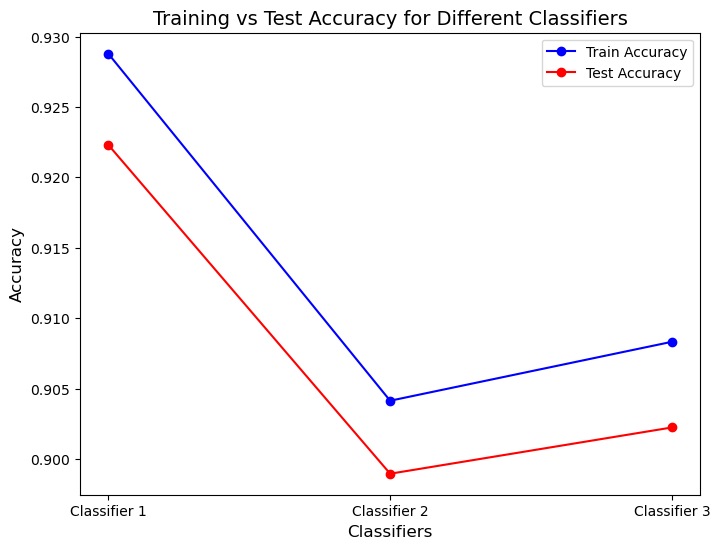

In [26]:
import matplotlib.pyplot as plt

# Data for plotting
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3']
train_accuracies = [0.928778, 0.904143, 0.908328]  # Replace with actual training accuracies
test_accuracies = [0.922305, 0.898961, 0.902246]  # Replace with actual test accuracies

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(classifiers, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(classifiers, test_accuracies, label='Test Accuracy', marker='o', color='red')

# Adding title and labels
plt.title('Training vs Test Accuracy for Different Classifiers', fontsize=14)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Show the plot
plt.show()


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate various performance metrics
def calculate_metrics(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Precision, Recall, F1-Score for Test Set
    precision = precision_score(y_test, test_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, test_pred, average='weighted')
    f1 = f1_score(y_test, test_pred, average='weighted')
    
    # Confusion matrix to calculate Specificity
    cm = confusion_matrix(y_test, test_pred)
    tn = cm.diagonal().sum() - cm.sum(axis=1)
    fp = cm.sum(axis=0) - cm.diagonal()
    fn = cm.sum(axis=1) - cm.diagonal()
    specificity = tn / (tn + fp)
    
    # Area Under ROC Curve (AUC) - One-vs-Rest strategy
    auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')
    
    return {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "specificity": specificity.mean(),  # Mean specificity for multi-class
        "auc": auc
    }

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Specificity": [],
    "AUC": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
results = calculate_metrics(clf1, X_train, y_train, X_test, y_test)
metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
results = calculate_metrics(clf2, X_train_new, y_train_new, X_test_new, y_test_new)
metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
results = calculate_metrics(clf3, X_train_new, y_train_new, X_test_new, y_test_new)
metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  \
0  Classifier 1        0.928778       0.922305   0.921902  0.922305  0.922063   
1  Classifier 2        0.904143       0.898961   0.898696  0.898961  0.898065   
2  Classifier 3        0.908328       0.902246   0.901412  0.902246  0.901065   

   Specificity       AUC  
0     0.966650  0.987987  
1     0.955104  0.981300  
2     0.956355  0.982515  


# Performance Evaluation of MLP Classifiers with Varying Training Data Splits: Accuracy, Precision, Recall, F1 Score, and Confusion Matrix


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate accuracy and confusion matrix
def calculate_metrics(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Calculate precision, recall, and F1 score for each class
    precision = precision_score(y_test, test_pred, average=None)
    recall = recall_score(y_test, test_pred, average=None)
    f1 = f1_score(y_test, test_pred, average=None)
    
    # Confusion matrix (multi-class)
    cm = confusion_matrix(y_test, test_pred)
    
    # Calculate TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (FP + FN + TP)
    
    return train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf1, X_train, y_train, X_test, y_test)

# Store metrics
metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf2, X_train_new, y_train_new, X_test_new, y_test_new)

# Store metrics
metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf3, X_train_new, y_train_new, X_test_new, y_test_new)

# Store metrics
metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy  \
0  Classifier 1        0.928778       0.922305   
1  Classifier 2        0.904143       0.898961   
2  Classifier 3        0.908328       0.902246   

                                           Precision  \
0  [0.8991944263008926, 0.7619047619047619, 0.934...   
1  [0.8808093582042364, 0.7824497257769653, 0.927...   
2  [0.8945264986967854, 0.7422839506172839, 0.909...   

                                              Recall  \
0  [0.8838005563877595, 0.7117988394584139, 0.942...   
1  [0.853292496171516, 0.5839017735334243, 0.9053...   
2  [0.7758854559155991, 0.6522033898305085, 0.936...   

                                            F1 Score  \
0  [0.8914310382041873, 0.736, 0.9386463085373802...   
1  [0.8668326073428749, 0.66875, 0.91611428571428...   
2  [0.8309927360774818, 0.6943341753879466, 0.922...   

                          TP                            TN  \
0  [4130, 736, 15123, 13095]  [30735, 34607, 18771, 20713]   


# Overfitting Analysis: Identifying Accuracy Gaps Between Train and Test Data for MLP Classifiers


In [31]:

# Calculate accuracy gap (train accuracy - test accuracy)
metrics_df["Accuracy Gap"] = metrics_df["Train Accuracy"] - metrics_df["Test Accuracy"]

# Print results for overfitting analysis
print(metrics_df[["Classifier", "Train Accuracy", "Test Accuracy", "Accuracy Gap"]])

# Threshold for overfitting (you can adjust this based on your dataset or domain knowledge)
overfitting_threshold = 0.05

# Identify classifiers with potential overfitting
metrics_df['Overfitting'] = metrics_df['Accuracy Gap'] > overfitting_threshold
print(metrics_df[['Classifier', 'Accuracy Gap', 'Overfitting']])


     Classifier  Train Accuracy  Test Accuracy  Accuracy Gap
0  Classifier 1        0.928778       0.922305      0.006473
1  Classifier 2        0.904143       0.898961      0.005182
2  Classifier 3        0.908328       0.902246      0.006082
     Classifier  Accuracy Gap  Overfitting
0  Classifier 1      0.006473        False
1  Classifier 2      0.005182        False
2  Classifier 3      0.006082        False


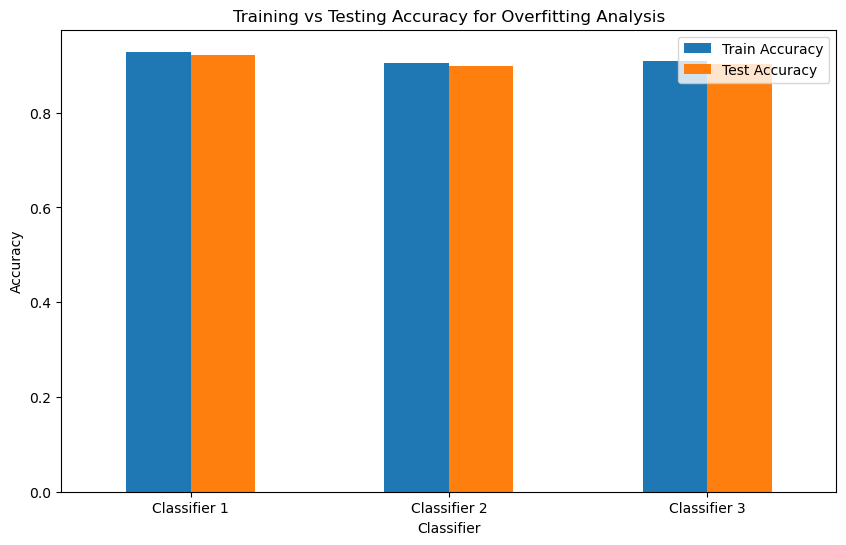

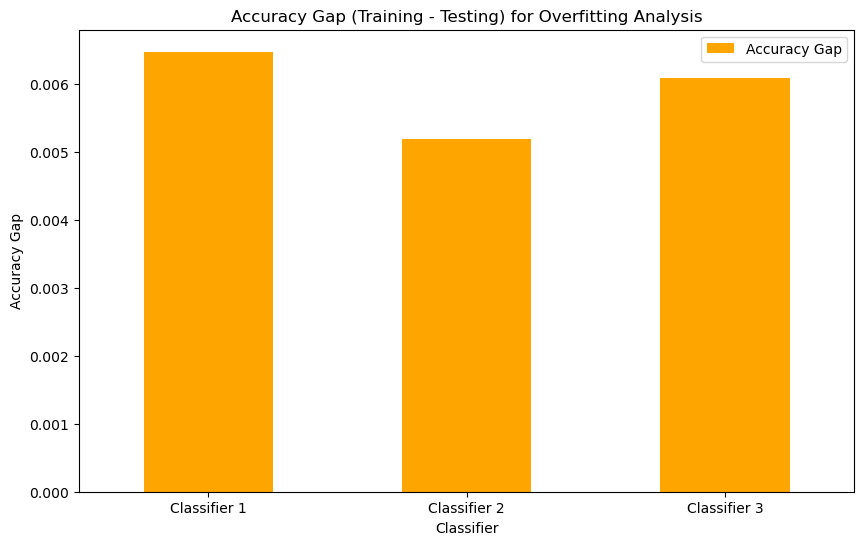

In [32]:
import matplotlib.pyplot as plt

# Plotting the Training vs Testing Accuracy
metrics_df.plot(
    x="Classifier", 
    y=["Train Accuracy", "Test Accuracy"], 
    kind="bar", 
    figsize=(10, 6)
)
plt.title("Training vs Testing Accuracy for Overfitting Analysis")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

# Plotting the Accuracy Gap (Training - Testing)
metrics_df.plot(
    x="Classifier", 
    y="Accuracy Gap", 
    kind="bar", 
    figsize=(10, 6), 
    color='orange'
)
plt.title("Accuracy Gap (Training - Testing) for Overfitting Analysis")
plt.ylabel("Accuracy Gap")
plt.xticks(rotation=0)
plt.show()


In [33]:
# Calculate and display mean Precision, Recall, and F1 Score for each classifier
metrics_df["Mean Precision"] = metrics_df["Precision"].apply(lambda x: sum(x) / len(x))
metrics_df["Mean Recall"] = metrics_df["Recall"].apply(lambda x: sum(x) / len(x))
metrics_df["Mean F1 Score"] = metrics_df["F1 Score"].apply(lambda x: sum(x) / len(x))

print(metrics_df[["Classifier", "Mean Precision", "Mean Recall", "Mean F1 Score"]])


     Classifier  Mean Precision  Mean Recall  Mean F1 Score
0  Classifier 1        0.880590     0.866406       0.873265
1  Classifier 2        0.868011     0.818077       0.839190
2  Classifier 3        0.863194     0.822351       0.840920


In [34]:
# conclusion based on overfitting analysis
print("\nConclusions:")
for index, row in metrics_df.iterrows():
    print(f"\n{row['Classifier']}:")
    if row['Overfitting']:
        print("  **Overfitting Detected**: Large accuracy gap between training and testing accuracy.")
        print("  Possible causes could be a model that is too complex or lacks regularization.")
    else:
        print("  No significant overfitting detected: The model generalizes well on test data.")



Conclusions:

Classifier 1:
  No significant overfitting detected: The model generalizes well on test data.

Classifier 2:
  No significant overfitting detected: The model generalizes well on test data.

Classifier 3:
  No significant overfitting detected: The model generalizes well on test data.


## Classifiers on data 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv"
data = pd.read_csv(url)

# Assuming the last column is the target variable and others are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate accuracy
def calculate_accuracy(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    return train_accuracy, test_accuracy

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf1, X_train, y_train, X_test, y_test)

metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf2, X_train_new, y_train_new, X_test_new, y_test_new)

metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy = calculate_accuracy(clf3, X_train_new, y_train_new, X_test_new, y_test_new)

metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy
0  Classifier 1        0.927101       0.925316
1  Classifier 2        0.922040       0.918909
2  Classifier 3        0.860380       0.852122


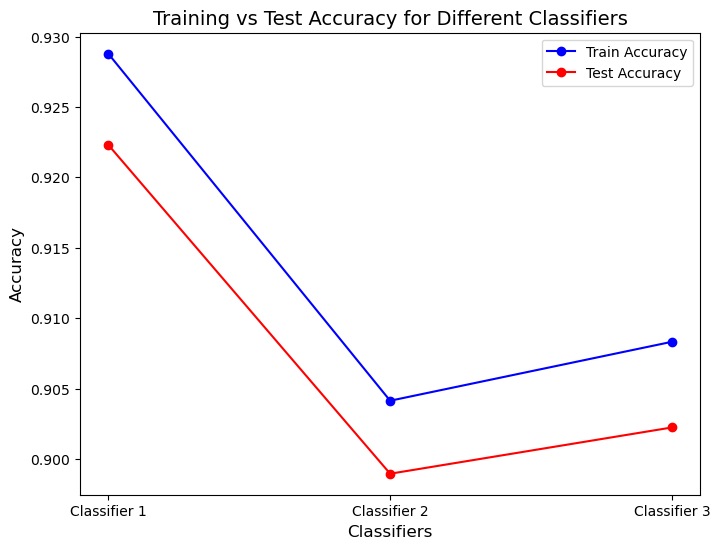

In [9]:
import matplotlib.pyplot as plt

# Data for plotting
classifiers = ['Classifier 1', 'Classifier 2', 'Classifier 3']
train_accuracies = [0.928778, 0.904143, 0.908328]  # Replace with actual training accuracies
test_accuracies = [0.922305, 0.898961, 0.902246]  # Replace with actual test accuracies

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(classifiers, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(classifiers, test_accuracies, label='Test Accuracy', marker='o', color='red')

# Adding title and labels
plt.title('Training vs Test Accuracy for Different Classifiers', fontsize=14)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

# Show the plot
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate various performance metrics
def calculate_metrics(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Precision, Recall, F1-Score for Test Set
    precision = precision_score(y_test, test_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, test_pred, average='weighted')
    f1 = f1_score(y_test, test_pred, average='weighted')
    
    # Confusion matrix to calculate Specificity
    cm = confusion_matrix(y_test, test_pred)
    tn = cm.diagonal().sum() - cm.sum(axis=1)
    fp = cm.sum(axis=0) - cm.diagonal()
    fn = cm.sum(axis=1) - cm.diagonal()
    specificity = tn / (tn + fp)
    
    # Area Under ROC Curve (AUC) - One-vs-Rest strategy
    auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')
    
    return {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "specificity": specificity.mean(),  # Mean specificity for multi-class
        "auc": auc
    }

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "Specificity": [],
    "AUC": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
results = calculate_metrics(clf1, X_train, y_train, X_test, y_test)
metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
results = calculate_metrics(clf2, X_train_new, y_train_new, X_test_new, y_test_new)
metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
results = calculate_metrics(clf3, X_train_new, y_train_new, X_test_new, y_test_new)
metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(results["train_accuracy"])
metrics["Test Accuracy"].append(results["test_accuracy"])
metrics["Precision"].append(results["precision"])
metrics["Recall"].append(results["recall"])
metrics["F1 Score"].append(results["f1_score"])
metrics["Specificity"].append(results["specificity"])
metrics["AUC"].append(results["auc"])

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy  Precision    Recall  F1 Score  \
0  Classifier 1        0.916572       0.911331   0.912340  0.911331  0.911389   
1  Classifier 2        0.902392       0.901136   0.902647  0.901136  0.901124   
2  Classifier 3        0.897151       0.895543   0.896469  0.895543  0.895371   

   Specificity       AUC  
0     0.967693  0.989770  
1     0.963591  0.987322  
2     0.961218  0.984893  


In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Best-performing architecture parameters
best_arch = {
    "hidden_layer_sizes": (64, 64, 32),
    "learning_rate_init": 0.001,
    "activation": "logistic",
    "random_state": 42,
    "max_iter": 500
}

# Helper function to calculate accuracy and confusion matrix
def calculate_metrics(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    # Predict on the training and test datasets
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Calculate precision, recall, and F1 score for each class
    precision = precision_score(y_test, test_pred, average=None)
    recall = recall_score(y_test, test_pred, average=None)
    f1 = f1_score(y_test, test_pred, average=None)
    
    # Confusion matrix (multi-class)
    cm = confusion_matrix(y_test, test_pred)
    
    # Calculate TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (FP + FN + TP)
    
    return train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1

# Store metrics for each classifier
metrics = {
    "Classifier": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "TP": [],
    "TN": [],
    "FP": [],
    "FN": []
}

# Classifier 1 - Using training and testing data
clf1 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf1, X_train, y_train, X_test, y_test)

# Store metrics
metrics["Classifier"].append("Classifier 1")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Classifier 2 - Moving 30% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
clf2 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf2, X_train_new, y_train_new, X_test_new, y_test_new)

# Store metrics
metrics["Classifier"].append("Classifier 2")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Classifier 3 - Moving 60% of training data to testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.6, random_state=42)
clf3 = MLPClassifier(**best_arch)
train_accuracy, test_accuracy, TP, TN, FP, FN, precision, recall, f1 = calculate_metrics(clf3, X_train_new, y_train_new, X_test_new, y_test_new)

# Store metrics
metrics["Classifier"].append("Classifier 3")
metrics["Train Accuracy"].append(train_accuracy)
metrics["Test Accuracy"].append(test_accuracy)
metrics["Precision"].append(precision)
metrics["Recall"].append(recall)
metrics["F1 Score"].append(f1)
metrics["TP"].append(TP)
metrics["TN"].append(TN)
metrics["FP"].append(FP)
metrics["FN"].append(FN)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print(metrics_df)


     Classifier  Train Accuracy  Test Accuracy  \
0  Classifier 1        0.927101       0.925316   
1  Classifier 2        0.922040       0.918909   
2  Classifier 3        0.860380       0.852122   

                                           Precision  \
0  [0.9368533713877988, 0.7806748466257669, 0.906...   
1  [0.873139974779319, 0.8278041074249605, 0.9220...   
2  [0.8622960634635534, 0.8567961165048543, 0.813...   

                                              Recall  \
0  [0.845460399227302, 0.7313218390804598, 0.9745...   
1  [0.9074705111402359, 0.6186540731995277, 0.947...   
2  [0.7582258489076072, 0.41431924882629106, 0.95...   

                                            F1 Score  \
0  [0.8888136740565239, 0.755192878338279, 0.9395...   
1  [0.889974293059126, 0.7081081081081081, 0.9344...   
2  [0.8069192520484628, 0.5585443037974683, 0.879...   

                          TP                            TN  \
0   [2626, 509, 10435, 8558]  [20631, 23075, 12136, 14114]   


In [3]:
# Assuming you already have the data in a DataFrame like metrics_df

# Calculate accuracy gap (train accuracy - test accuracy)
metrics_df["Accuracy Gap"] = metrics_df["Train Accuracy"] - metrics_df["Test Accuracy"]

# Print results for overfitting analysis
print(metrics_df[["Classifier", "Train Accuracy", "Test Accuracy", "Accuracy Gap"]])

# Threshold for overfitting (you can adjust this based on your dataset or domain knowledge)
overfitting_threshold = 0.05

# Identify classifiers with potential overfitting
metrics_df['Overfitting'] = metrics_df['Accuracy Gap'] > overfitting_threshold
print(metrics_df[['Classifier', 'Accuracy Gap', 'Overfitting']])


     Classifier  Train Accuracy  Test Accuracy  Accuracy Gap
0  Classifier 1        0.927101       0.925316      0.001785
1  Classifier 2        0.922040       0.918909      0.003131
2  Classifier 3        0.860380       0.852122      0.008258
     Classifier  Accuracy Gap  Overfitting
0  Classifier 1      0.001785        False
1  Classifier 2      0.003131        False
2  Classifier 3      0.008258        False


Overfitting Analysis:
     Classifier  Train Accuracy  Test Accuracy  Accuracy Gap
0  Classifier 1        0.916572       0.911331      0.005241
1  Classifier 2        0.902392       0.901136      0.001255
2  Classifier 3        0.897151       0.895543      0.001608

Classifiers with Overfitting Analysis:
     Classifier  Accuracy Gap  Overfitting
0  Classifier 1      0.005241        False
1  Classifier 2      0.001255        False
2  Classifier 3      0.001608        False


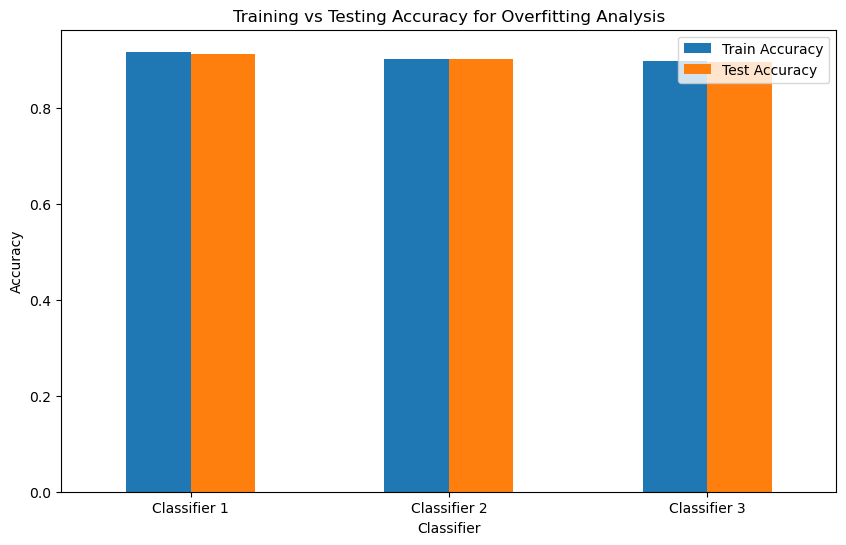

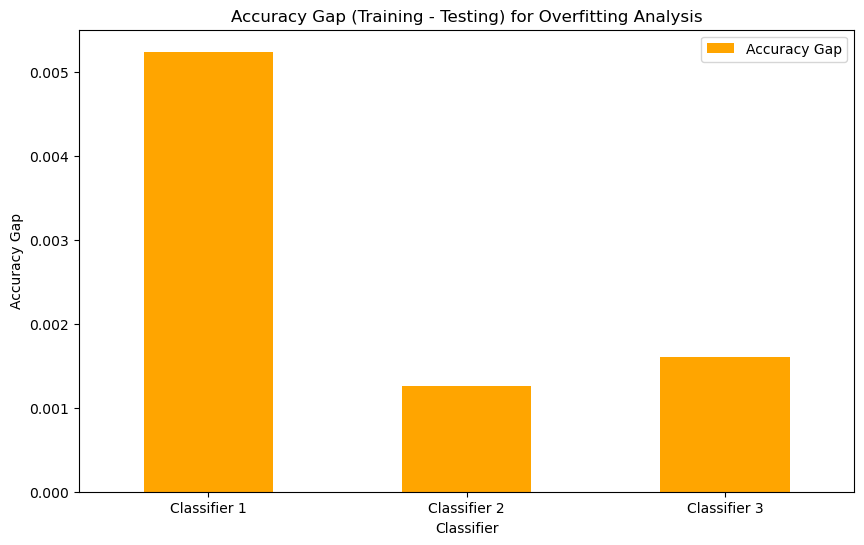

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming metrics_df is already defined with the classifier metrics

# Calculate accuracy gap (train accuracy - test accuracy)
metrics_df["Accuracy Gap"] = metrics_df["Train Accuracy"] - metrics_df["Test Accuracy"]

# Print results for overfitting analysis
print("Overfitting Analysis:")
print(metrics_df[["Classifier", "Train Accuracy", "Test Accuracy", "Accuracy Gap"]])

# Threshold for overfitting (you can adjust this based on your dataset or domain knowledge)
overfitting_threshold = 0.05

# Identify classifiers with potential overfitting
metrics_df['Overfitting'] = metrics_df['Accuracy Gap'] > overfitting_threshold

# Print the classifiers with their overfitting status
print("\nClassifiers with Overfitting Analysis:")
print(metrics_df[['Classifier', 'Accuracy Gap', 'Overfitting']])

# Plotting the Training vs Testing Accuracy
metrics_df.plot(
    x="Classifier", 
    y=["Train Accuracy", "Test Accuracy"], 
    kind="bar", 
    figsize=(10, 6)
)
plt.title("Training vs Testing Accuracy for Overfitting Analysis")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

# Plotting the Accuracy Gap (Training - Testing)
metrics_df.plot(
    x="Classifier", 
    y="Accuracy Gap", 
    kind="bar", 
    figsize=(10, 6), 
    color='orange'
)
plt.title("Accuracy Gap (Training - Testing) for Overfitting Analysis")
plt.ylabel("Accuracy Gap")
plt.xticks(rotation=0)
plt.show()



In [4]:
# Assuming 'Precision', 'Recall', and 'F1 Score' columns contain a single value for each classifier

# Directly assign the values to mean columns since there is no need for averaging (they are already single values)
metrics_df["Mean Precision"] = metrics_df["Precision"]
metrics_df["Mean Recall"] = metrics_df["Recall"]
metrics_df["Mean F1 Score"] = metrics_df["F1 Score"]

# Print the updated DataFrame with mean precision, recall, and F1 score
print(metrics_df[["Classifier", "Mean Precision", "Mean Recall", "Mean F1 Score"]])


     Classifier                                     Mean Precision  \
0  Classifier 1  [0.9368533713877988, 0.7806748466257669, 0.906...   
1  Classifier 2  [0.873139974779319, 0.8278041074249605, 0.9220...   
2  Classifier 3  [0.8622960634635534, 0.8567961165048543, 0.813...   

                                         Mean Recall  \
0  [0.845460399227302, 0.7313218390804598, 0.9745...   
1  [0.9074705111402359, 0.6186540731995277, 0.947...   
2  [0.7582258489076072, 0.41431924882629106, 0.95...   

                                       Mean F1 Score  
0  [0.8888136740565239, 0.755192878338279, 0.9395...  
1  [0.889974293059126, 0.7081081081081081, 0.9344...  
2  [0.8069192520484628, 0.5585443037974683, 0.879...  


In [5]:
# Example conclusion based on overfitting analysis
print("\nConclusions:")
for index, row in metrics_df.iterrows():
    print(f"\n{row['Classifier']}:")
    if row['Overfitting']:
        print("  **Overfitting Detected**: Large accuracy gap between training and testing accuracy.")
        print("  Possible causes could be a model that is too complex or lacks regularization.")
    else:
        print("  No significant overfitting detected: The model generalizes well on test data.")



Conclusions:

Classifier 1:
  No significant overfitting detected: The model generalizes well on test data.

Classifier 2:
  No significant overfitting detected: The model generalizes well on test data.

Classifier 3:
  No significant overfitting detected: The model generalizes well on test data.


# Strategies to Prevent Overfitting in Neural Networks

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

# Define the model with Input layer
model_with_dropout = Sequential()

# Input layer
model_with_dropout.add(Input(shape=(X_train.shape[1],)))  

# Hidden layers with Dropout
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))  # Dropout rate of 20%

model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))  # Dropout rate of 20%

model_with_dropout.add(Dense(32, activation='relu'))

# Output layer
model_with_dropout.add(Dense(1, activation='sigmoid'))

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
train_accuracy_dropout = model_with_dropout.evaluate(X_train, y_train)
test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test)

print(f"Train Accuracy with Dropout: {train_accuracy_dropout[1]}")
print(f"Test Accuracy with Dropout: {test_accuracy_dropout[1]}")


Epoch 1/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1304 - loss: -1904001024.0000 - val_accuracy: 0.1318 - val_loss: -42255937536.0000
Epoch 2/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1326 - loss: -105244565504.0000 - val_accuracy: 0.1318 - val_loss: -443628945408.0000
Epoch 3/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1319 - loss: -670899765248.0000 - val_accuracy: 0.1318 - val_loss: -1629212114944.0000
Epoch 4/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1311 - loss: -2138753728512.0000 - val_accuracy: 0.1318 - val_loss: -4054000861184.0000
Epoch 5/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1328 - loss: -4987907735552.0000 - val_accuracy: 0.1318 - val_loss: -8247280926720.0000
Epoch 6/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1323 - loss: -9750959882240.0000 - val_accuracy: 0.1318 - val_loss: -14801620172800.0000
Epoch 7/50
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.133

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Assuming y_train and y_test are original labels
y_train_onehot = to_categorical(y_train, num_classes=5)
y_test_onehot = to_categorical(y_test, num_classes=5)

# Build the model with 5 output units for 5 classes
model = Sequential()

# Use Input layer instead of specifying input_dim in Dense
model.add(Input(shape=(X_train.shape[1],)))  # Define the input shape here

# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with 5 classes
model.add(Dense(5, activation='softmax'))  # 5 units for 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=100, batch_size=32, callbacks=[early_stopping])



Epoch 1/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5389 - loss: 3.7931 - val_accuracy: 0.7284 - val_loss: 1.2451
Epoch 2/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7122 - loss: 1.2765 - val_accuracy: 0.6611 - val_loss: 1.0970
Epoch 3/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7471 - loss: 0.8942 - val_accuracy: 0.7590 - val_loss: 0.8578
Epoch 4/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7695 - loss: 0.7384 - val_accuracy: 0.7356 - val_loss: 0.9204
Epoch 5/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8008 - loss: 0.5757 - val_accuracy: 0.8296 - val_loss: 0.4622
Epoch 6/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8189 - loss: 0.5050 - val_accuracy: 0.8530 - val_loss: 0.4023
Epoch 7/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8402 - loss: 0.4355 - val_accuracy: 0.8199 - val_loss: 0.5394
Epoch 8/100
2616/2616 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8453 - loss: 0

## Strategies to Prevent Overfitting in Neural Networks for feature selected data 

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Load your dataset (adjust path and filename as needed)
data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')

# Print column names 
print(data.columns)

# Use the target column after inspecting the column names
X = data.drop('Loyalty', axis=1)  
y = data['Loyalty']  

y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with Input layer
model_with_dropout = Sequential()

# Input layer
model_with_dropout.add(Input(shape=(X_train.shape[1],)))  # Use Input layer

# Hidden layers with Dropout
model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))  # Dropout rate of 20%

model_with_dropout.add(Dense(64, activation='relu'))
model_with_dropout.add(Dropout(0.2))  # Dropout rate of 20%

model_with_dropout.add(Dense(32, activation='relu'))

# Output layer with softmax activation for multiclass classification
model_with_dropout.add(Dense(4, activation='softmax'))  # 4 classes for ranks 1, 2, 3, 4

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
train_accuracy_dropout = model_with_dropout.evaluate(X_train, y_train)
test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test)

print(f"Train Accuracy with Dropout: {train_accuracy_dropout[1]}")
print(f"Test Accuracy with Dropout: {test_accuracy_dropout[1]}")

# Make predictions on the test data (output probabilities for each class)
y_pred_proba = model_with_dropout.predict(X_test)

# Convert probabilities to class predictions (argmax gives index of highest probability)
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute confusion matrix for multiclass classification
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN for each class (0-3)
for i in range(4):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {TP}")
    print(f"  False Positive (FP): {FP}")
    print(f"  True Negative (TN): {TN}")
    print(f"  False Negative (FN): {FN}")



Index(['Type of Travel', 'Online Boarding', 'In-flight Wifi Service',
       'Ease of Online Booking', 'Age', 'In-flight Entertainment',
       'Flight Distance', 'Departure and Arrival Time Convenience',
       'Seat Comfort', 'Class', 'Cleanliness', 'On-board Service',
       'Leg Room Service', 'Loyalty'],
      dtype='object')
Epoch 1/50
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8220 - loss: 0.4868 - val_accuracy: 0.8999 - val_loss: 0.2775
Epoch 2/50
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8929 - loss: 0.2986 - val_accuracy: 0.9107 - val_loss: 0.2453
Epoch 3/50
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9002 - loss: 0.2738 - val_accuracy: 0.9137 - val_loss: 0.2351
Epoch 4/50
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9062 - loss: 0.2614 - val_accuracy: 0.9154 - val_loss: 0.2275
Epoch 5/50
4225/4225 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9071 - loss: 0.2560 - val_accuracy: 0.9173 - val_loss: 0.2253
Epoch 6/50
4225/

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Assuming y_train and y_test are your original labels
y_train_onehot = to_categorical(y_train, num_classes=5)
y_test_onehot = to_categorical(y_test, num_classes=5)

# Build the model with 5 output units for 5 classes
model = Sequential()

# Use Input layer instead of specifying input_dim in Dense
model.add(Input(shape=(X_train.shape[1],)))  # Define the input shape here

# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with 5 classes
model.add(Dense(5, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=100, batch_size=32, callbacks=[early_stopping])



Epoch 1/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8665 - loss: 0.3752 - val_accuracy: 0.9092 - val_loss: 0.2450
Epoch 2/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9145 - loss: 0.2325 - val_accuracy: 0.9172 - val_loss: 0.2206
Epoch 3/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9208 - loss: 0.2124 - val_accuracy: 0.9233 - val_loss: 0.2037
Epoch 4/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9245 - loss: 0.1991 - val_accuracy: 0.9209 - val_loss: 0.2122
Epoch 5/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9281 - loss: 0.1888 - val_accuracy: 0.9263 - val_loss: 0.1916
Epoch 6/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9302 - loss: 0.1838 - val_accuracy: 0.9282 - val_loss: 0.1900
Epoch 7/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9321 - loss: 0.1793 - val_accuracy: 0.9303 - val_loss: 0.1843
Epoch 8/100
5281/5281 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9337 - loss

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming the model has been trained already with code

# Make predictions on the training and test set
y_train_pred_proba = model.predict(X_train)
y_test_pred_proba = model.predict(X_test)

# Convert probabilities to class predictions (argmax gives the index of the highest probability)
y_train_pred = np.argmax(y_train_pred_proba, axis=1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)

# Convert one-hot encoded labels back to class labels
y_train = np.argmax(y_train_onehot, axis=1)
y_test = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix for train and test data
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Extract TP, FP, TN, FN for each class in the train and test confusion matrices
def extract_metrics(cm):
    metrics = {}
    for i in range(cm.shape[0]):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        
        metrics[i] = {
            'TP': TP,
            'FP': FP,
            'TN': TN,
            'FN': FN
        }
    return metrics

# Extract metrics for train and test confusion matrices
train_metrics = extract_metrics(cm_train)
test_metrics = extract_metrics(cm_test)

# Print train and test metrics
print("Train Metrics:")
for class_label, metrics in train_metrics.items():
    print(f"Class {class_label}: TP={metrics['TP']}, FP={metrics['FP']}, TN={metrics['TN']}, FN={metrics['FN']}")

print("\nTest Metrics:")
for class_label, metrics in test_metrics.items():
    print(f"Class {class_label}: TP={metrics['TP']}, FP={metrics['FP']}, TN={metrics['TN']}, FN={metrics['FN']}")

# Train and Test Accuracy
train_accuracy = model.evaluate(X_train, y_train_onehot, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)[1]

print(f"\nTrain Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


5281/5281 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1321/1321 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train Metrics:
Class 0: TP=39689, FP=2653, TN=123979, FN=2664
Class 1: TP=39952, FP=2361, TN=124475, FN=2197
Class 2: TP=40573, FP=2413, TN=124325, FN=1674
Class 3: TP=39490, FP=1854, TN=124895, FN=2746

Test Metrics:
Class 0: TP=9661, FP=761, TN=31031, FN=794
Class 1: TP=10010, FP=707, TN=30881, FN=649
Class 2: TP=10090, FP=696, TN=30990, FN=471
Class 3: TP=9767, FP=555, TN=31120, FN=805

Train Accuracy: 0.9450779557228088
Test Accuracy: 0.9356403946876526
